In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import time
import sys
import tensorflow as tf
from tensorflow.python import keras


print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.14.5
pandas 0.23.0
sklearn 0.19.1
tensorflow 2.0.0
tensorflow.python.keras 2.2.4-tf


In [31]:
# 实战分类模型 数据读取与展示
# https://github.com/Dean0371/Tensorflow2.0/blob/225eb6f56a1df56b101b546a694f4825a8e0429e/Tensorflow2.0_%E8%B0%B7%E6%AD%8C/2_Keras/tf_keras_classification_model.py

In [32]:
# 导入数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# numpy的格式，前5000个是验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


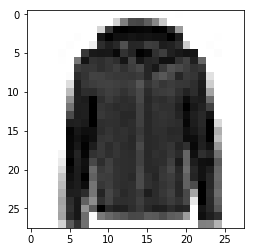

In [33]:
# 展示一张图片
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

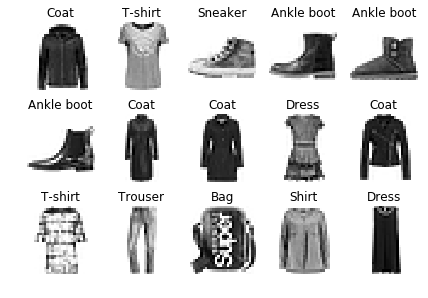

In [34]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt','Trouser','Pullover','Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_images(3,5,x_train,y_train,class_names)

In [35]:
# 实战分类模型 模型构建

model = keras.models.Sequential()   #  keras.Sequential() 好像与此一样
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))  # relu : y = max(0,x)
model.add(keras.layers.Dense(10,activation="softmax"))

# softmax : x = [x1, x2, x3],将向量变成概率分布
# y = [e^x1/sum, e^x2/sum,e^x3/sum]   sum = e^x1+e^x2+e^x3

# reason for sparse:y->index, index->one hot->[0,...,1,...0]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",  # 优化方法，若loss太低,可能是算法的问题,换用优化过的梯度下降算法
              metrics = ['accuracy'])

"""
或
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
"""

In [36]:
model.layers

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
# [None, 784] * w + b -> [None, 300] w.shape [784, 300], b = [300]

In [39]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 135us/sample - loss: 2.3488 - accuracy: 0.7641 - val_loss: 0.5389 - val_accuracy: 0.8282
Epoch 2/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.5241 - accuracy: 0.8245 - val_loss: 0.4260 - val_accuracy: 0.8450
Epoch 3/10
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4530 - accuracy: 0.8399 - val_loss: 0.4298 - val_accuracy: 0.8522
Epoch 4/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4339 - accuracy: 0.8458 - val_loss: 0.4565 - val_accuracy: 0.8556
Epoch 5/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4043 - accuracy: 0.8554 - val_loss: 0.3839 - val_accuracy: 0.8674
Epoch 6/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3869 - accuracy: 0.8625 - val_loss: 0.3975 - val_accuracy: 0.8662
Epoch 7/10
55000/55000 [===========================

In [40]:
history.history

{'loss': [2.348792530174689,
  0.5241167433218522,
  0.45295897119262,
  0.43386631223505195,
  0.4042938469539989,
  0.3868753115177155,
  0.3759079054333947,
  0.3705685110395605,
  0.35101137673638083,
  0.3508311602830887],
 'accuracy': [0.76412725,
  0.82454544,
  0.83985454,
  0.8458,
  0.8554,
  0.8625091,
  0.8655818,
  0.8680182,
  0.8740909,
  0.8751091],
 'val_loss': [0.5388667626857757,
  0.426013082420826,
  0.42983634703159335,
  0.4564706882238388,
  0.38386203982830047,
  0.39750623816251757,
  0.39257766809761524,
  0.3849393806904554,
  0.4196908606767654,
  0.42109201951026914],
 'val_accuracy': [0.8282,
  0.845,
  0.8522,
  0.8556,
  0.8674,
  0.8662,
  0.862,
  0.8666,
  0.87,
  0.8648]}

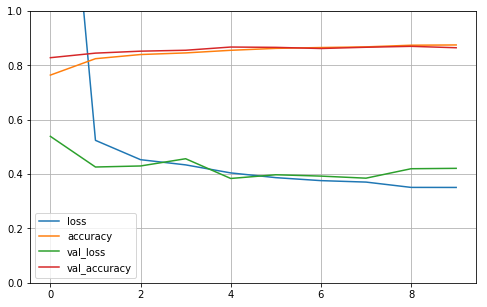

In [41]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)